#Text Representation: TF-IDF
TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical method used to evaluate the importance of a word in a document relative to a corpus. It calculates "term frequency" (how often a word appears in a document) and "inverse document frequency" (how rare the word is across all documents), emphasizing terms that are distinctive to specific texts.

**limitations:**
1. Semantic Blindness: TF-IDF treats words as independent units, ignoring context, word order, and semantic relationships (e.g., synonyms). For example, "good" and "not good" would be treated similarly, which is a problem.

2. Sparsity: High-dimensional vectors from large vocabularies create sparse representations, affecting computational efficiency.

4. Overemphasis on Rarity: Rare terms may receive inflated importance, even if irrelevant (e.g., typos). For instance, rare terms could get high IDF but might just be typos or irrelevant.

5. No Phrase Recognition: Fails to capture multi-word expressions unless explicitly modeled (e.g., via n-grams).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
corpus = [
    "Dogs love to play fetch in the park.",
    "Cats often nap in sunny spots around the house.",
    "Pizza is a popular food with many toppings.",
    "Apples are sweet and crunchy fruits.",
    "Bananas are a popular choice for smoothies.",
    "Books provide stories and knowledge to readers.",
    "Computers help people work and learn online.",
    "Rain makes the grass grow green and fresh.",
    "Biking is fun and good exercise."
]


let's create the vectorizer and fit the corpus and transform them accordingly

In [ ]:
v = TfidfVectorizer()
tf = v.fit_transform(corpus)
print(v.vocabulary_)

{'dogs': 11, 'love': 29, 'to': 49, 'play': 38, 'fetch': 13, 'in': 25, 'the': 48, 'park': 35, 'cats': 7, 'often': 33, 'nap': 32, 'sunny': 46, 'spots': 44, 'around': 3, 'house': 24, 'pizza': 37, 'is': 26, 'popular': 39, 'food': 14, 'with': 51, 'many': 31, 'toppings': 50, 'apples': 1, 'are': 2, 'sweet': 47, 'and': 0, 'crunchy': 10, 'fruits': 17, 'bananas': 4, 'choice': 8, 'for': 15, 'smoothies': 43, 'books': 6, 'provide': 40, 'stories': 45, 'knowledge': 27, 'readers': 42, 'computers': 9, 'help': 23, 'people': 36, 'work': 52, 'learn': 28, 'online': 34, 'rain': 41, 'makes': 30, 'grass': 20, 'grow': 22, 'green': 21, 'fresh': 16, 'biking': 5, 'fun': 18, 'good': 19, 'exercise': 12}


These are vocabulary with there index number but they are not in order. Let's print inverse document frequency(idf) of each word.

In [ ]:
all_features_names = v.get_feature_names_out()

for word in all_features_names:
  index = v.vocabulary_.get(word)
  print(f"{word}: {v.idf_[index]}")

and: 1.5108256237659907
apples: 2.6094379124341005
are: 2.203972804325936
around: 2.6094379124341005
bananas: 2.6094379124341005
biking: 2.6094379124341005
books: 2.6094379124341005
cats: 2.6094379124341005
choice: 2.6094379124341005
computers: 2.6094379124341005
crunchy: 2.6094379124341005
dogs: 2.6094379124341005
exercise: 2.6094379124341005
fetch: 2.6094379124341005
food: 2.6094379124341005
for: 2.6094379124341005
fresh: 2.6094379124341005
fruits: 2.6094379124341005
fun: 2.6094379124341005
good: 2.6094379124341005
grass: 2.6094379124341005
green: 2.6094379124341005
grow: 2.6094379124341005
help: 2.6094379124341005
house: 2.6094379124341005
in: 2.203972804325936
is: 2.203972804325936
knowledge: 2.6094379124341005
learn: 2.6094379124341005
love: 2.6094379124341005
makes: 2.6094379124341005
many: 2.6094379124341005
nap: 2.6094379124341005
often: 2.6094379124341005
online: 2.6094379124341005
park: 2.6094379124341005
people: 2.6094379124341005
pizza: 2.6094379124341005
play: 2.6094379124

In [ ]:
corpus[:1]

['Dogs love to play fetch in the park.']

In [ ]:
#let's print the transformed output from tf-idf
tf.toarray()[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37888438, 0.        , 0.37888438, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.32001178, 0.        , 0.        , 0.        , 0.37888438,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.37888438, 0.        , 0.        , 0.37888438, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.278241  , 0.32001178,
        0.        , 0.        , 0.        ]])

#Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

This data consists of two columns.
- **Text:** Description of an item sold on e-commerce website
- **Label:** Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Ecommerce_data.csv")
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [ ]:
df.shape

(24000, 2)

In [ ]:
df['label'].value_counts()

,count
label,
Household,6000
Electronics,6000
Clothing & Accessories,6000
Books,6000


From the above cell, we can see that all the labels(classes) occured equal number of times and perfectly balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [ ]:
#checking the unique category values in dataset
df['label'].unique()

array(['Household', 'Electronics', 'Clothing & Accessories', 'Books'],
      dtype=object)

In [ ]:
#add column and mapping label into numbers
df['label_num'] = df['label'].map({
    'Household': 0,
    'Electronics': 1,
    'Clothing & Accessories': 2,
    'Books' : 3
})

df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


#Train test split
- Build a model with original text (no pre processing)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['label_num'], test_size=0.2, random_state=2022, stratify=df['label_num'])

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [ ]:
y_train.value_counts()

,count
label_num,
0,4800
2,4800
3,4800
1,4800


In [ ]:
y_test.value_counts()

,count
label_num,
0,1200
2,1200
3,1200
1,1200


Both in training and testing dataset we have same number of classes because we pass the stratify=df['label_num'] parameter while spliting data into testing and training set.

**Attempt 1 :**

1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**

- use TF-IDF for pre-processing the text.
- use KNN as the classifier
- print the classification report.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

#2. fit with X_train and y_train dataset
clf.fit(X_train, y_train)

#3. getting the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.96      0.97      0.97      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.95      0.96      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [ ]:
X_test[:5]

,Text
20706,Lal Haveli Designer Handmade Patchwork Decorat...
19008,tirupur fashion biz Girls and Kids Solid Cotto...
14810,Modern Linguistics: An Introduction About The ...
2451,AmazonBasics Apple Certified 30-Pin to USB Cab...
6296,The Marine Corps Martial Arts Program: The Com...


In [ ]:
y_test[:5]

,label_num
20706,0
19008,2
14810,3
2451,1
6296,3


In [ ]:
y_pred[:5]

array([0, 2, 3, 1, 3])

**Attempt 2 :**

1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**

- use TF-IDF for pre-processing the text.

- use MultinomialNB as the classifier.

- print the classification report.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

multi_nb_clf = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('multi_nb', MultinomialNB())
])

multi_nb_clf.fit(X_train, y_train)

y_pred = multi_nb_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1200
           1       0.96      0.96      0.96      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.93      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



**Attempt 3 :**

1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**

- use TF-IDF for pre-processing the text.
- use Random Forest as the classifier.
- print the classification report.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.97      0.97      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



#Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [ ]:
# utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
  text = nlp(text)
  filtered_tokens = []

  # remove stop words and lemmatize the text
  for token in text:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)

  return " ".join(filtered_tokens)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
df['preprocessed_text'] = df['Text'].apply(preprocess)

In [ ]:
df.head()

,Text,label,label_num,preprocessed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2,Indira Designer Women Art Mysore Silk Saree Bl...


#Build a model with pre processed text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['label_num'], test_size=0.2, random_state=2022, stratify=df['label_num'])

Let's check the scores with our best model till now

- Random Forest

In [ ]:
#1. creating a pipeline object
rf_clf = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

#2. fitting the X_train and y_train
rf_clf.fit(X_train, y_train)

#3. getting the predections for X_test and store it in y_pred
y_pred = rf_clf.predict(X_test)

#4. printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.99      0.99      1200
           3       0.98      0.97      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



Comparing the classification reports, the RandomForest model performed better when using cleaned-up text rather than raw text. The F1 score improved with preprocessing (like removing stop words and lemmatization). This means that for this problem, cleaning the text helps the model work better.

#Plot confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm

array([[1160,   14,   17,    9],
       [  20, 1174,    0,    6],
       [   9,    1, 1184,    6],
       [  19,   12,    2, 1167]])

Text(70.72222222222221, 0.5, 'Truth')

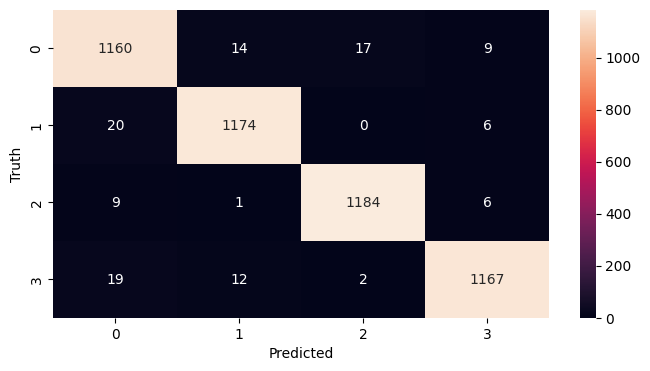

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#TF-IDF: Exercises
- Humans 👦 show different emotions/feelings based on the situations and communicate them through facial expressions or in form of words.

- In Social Media like Twitter and Instagram, many people express their views through comments about a particular event/scenario and these comments may address the feelings like sadness, happiness, joy, sarcasm, fear, and many other.

- For a given comment/text, we are going to use classical NLP techniques and classify under which emotion that particular comment belongs!

- We are going to use techniques like Bag of grams, n-grams, TF-IDF, etc. for text representation and apply different classification algorithms.

#About Data: Emotion Detection
Credits: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

- This data consists of two columns. - Comment - Emotion

- Comment are the statements or messages regarding to a particular event/situation.

- Emotion feature tells whether the given comment is fear 😨, Anger 😡, Joy 😂.

- As there are only 3 classes, this problem comes under the Multi-Class Classification.

In [ ]:
#import pandas library
import pandas as pd

#read the dataset with name "Emotion_classify_Data.csv" and store it in a variable df
df = pd.read_csv('/content/Emotion_classify_Data.csv')

#print top 5 rows
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [ ]:
df.shape

(5937, 2)

In [ ]:
#check the distribution of Emotion
df['Emotion'].value_counts()

,count
Emotion,
anger,2000
joy,2000
fear,1937


The dataset Emotion categories are almost equally distributed so it's balanced dataset and we don't need to perform any imbalanced dataset technique such as oversampling, undersampling etc.

In [ ]:
#Add the new column "Emotion_num" which gives a unique number to each of these Emotions
#joy --> 0, fear --> 1, anger --> 2
df['Emotion_num'] = df['Emotion'].map({
    'joy': 0,
    'fear': 1,
    'anger': 2
})

#checking the results by printing top 5 rows
df.head()

,Comment,Emotion,Emotion_num
0,i seriously hate one subject to death but now ...,fear,1
1,im so full of life i feel appalled,anger,2
2,i sit here to write i start to dig out my feel...,fear,1
3,ive been really angry with r and i feel like a...,joy,0
4,i feel suspicious if there is no one outside l...,fear,1


#Modelling without Pre-processing Text data

In [ ]:
#import train-test split
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20%
#Note: Give Random state 2022 and also do the stratify sampling
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion_num'], test_size=0.2, random_state=2022, stratify=df['Emotion_num'])

In [ ]:
#print the shapes of X_train and X_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4749,)
Shape of X_test:  (1188,)


**Attempt 1 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

- using **CountVectorizer** with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#1. creating pipeline object
cv_rf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('rf', RandomForestClassifier())
])

#2. fit with X_train and y_train
cv_rf.fit(X_train, y_train)

#3. getting the predictions for X_test
y_pred = cv_rf.predict(X_test)

#4. printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.24      0.34       400
           1       0.37      0.80      0.50       388
           2       0.51      0.22      0.31       400

    accuracy                           0.41      1188
   macro avg       0.48      0.42      0.38      1188
weighted avg       0.48      0.41      0.38      1188



**Attempt 2 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

- using **CountVectorizer** with both unigram and bigrams.
- use **Multinomial Naive Bayes** as the classifier.
- print the classification report.

In [ ]:
#1. creating pipeline object
cv_nb = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('nb', MultinomialNB())
])

#2. fitting with X_train and y_train
cv_nb.fit(X_train, y_train)

#3. getting the predictions for X_test and store it in y_pred
y_pred = cv_nb.predict(X_test)

#printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       400
           1       0.87      0.83      0.85       388
           2       0.83      0.88      0.85       400

    accuracy                           0.86      1188
   macro avg       0.86      0.86      0.86      1188
weighted avg       0.86      0.86      0.86      1188



**Attempt 3 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

- using **CountVectorizer** with both unigram and Bigrams.
- use **RandomForest** as the classifier.
- print the classification report.

In [ ]:
#1. creating a pipeline object
cv_rf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('rf', RandomForestClassifier())
])

#2. fitting with X_train and y_train
cv_rf.fit(X_train, y_train)

#3. getting the predications for X_test
y_pred = cv_rf.predict(X_test)

#4. printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       400
           1       0.95      0.89      0.92       388
           2       0.92      0.86      0.89       400

    accuracy                           0.90      1188
   macro avg       0.91      0.90      0.90      1188
weighted avg       0.91      0.90      0.90      1188



**Attempt 4 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

- using **TF-IDF vectorizer** for Pre-processing the text.
- use **RandomForest** as the classifier.
- print the classification report.

In [ ]:
#1. creating a pipeline object
tf_rf = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

#2. fitting with X_train and y_train
tf_rf.fit(X_train, y_train)

#3. getting the predication for X_test
y_pred = tf_rf.predict(X_test)

#4. printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       400
           1       0.91      0.91      0.91       388
           2       0.94      0.88      0.91       400

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



#Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [ ]:
import spacy

#loading the english language model and create nlp object from it
nlp = spacy.load('en_core_web_sm')

#use this utility function to get the preprocessed text data
def preprocess(text):
  # remove stop words and lemmatize the text
  doc = nlp(text)
  filtered_tokens = []

  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)
  return " ". join(filtered_tokens)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
# create a new column "preprocessed_comment" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_comment'] = df['Comment'].apply(preprocess)

In [ ]:
df.head()

,Comment,Emotion,Emotion_num,preprocessed_comment
0,i seriously hate one subject to death but now ...,fear,1,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,anger,2,m life feel appalled
2,i sit here to write i start to dig out my feel...,fear,1,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,0,ve angry r feel like idiot trust place
4,i feel suspicious if there is no one outside l...,fear,1,feel suspicious outside like rapture happen


#Build a model with pre processed text

In [ ]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Use the preprocessed_Comment
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_comment'],
                                                    df['Emotion_num'],
                                                    test_size=0.2,
                                                    random_state=2022,
                                                    stratify=df['Emotion_num'])

**Let's check the scores with our best model till now**

- Random Forest

**Attempt1 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

- using **CountVectorizer** with both unigrams and bigrams.
- use **RandomForest** as the classifier.
- print the classification report.

In [ ]:
#1. creating a pipeline object
cv_rf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('rf', RandomForestClassifier())
])

#2. fitting with X_train and y_train
cv_rf.fit(X_train, y_train)

#3. getting the prediction for X_test
y_pred = cv_rf.predict(X_test)

#4. printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       400
           1       0.94      0.92      0.93       388
           2       0.92      0.94      0.93       400

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



**Attempt 2 :**

1. using the sklearn pipeline module create a classification pipeline to classify the data.

**Note:**

- using **TF-IDF vectorizer** for pre-processing the text.
- use **RandomForest** as the classifier.
- print the classification report.

In [ ]:
#1. creating a pipeline object
tf_rf = Pipeline([
    ('td-idf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

#2. fitting with X_train and y_train
tf_rf.fit(X_train, y_train)

#3. getting the predications for X_test
y_pred = tf_rf.predict(X_test)

#4. printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       400
           1       0.93      0.93      0.93       388
           2       0.94      0.92      0.93       400

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm

array([[381,  11,   8],
       [ 12, 362,  14],
       [ 17,  15, 368]])

Text(70.72222222222221, 0.5, 'Truth')

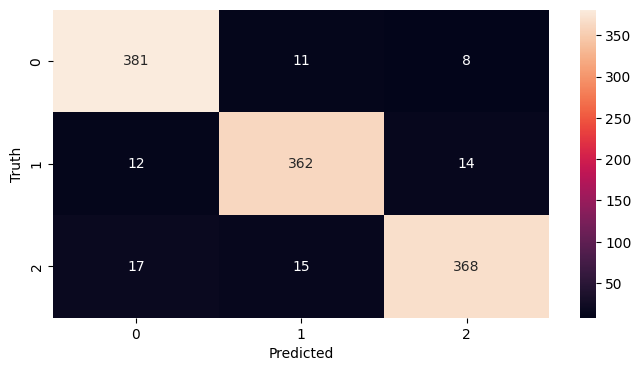

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Final Obversations

- In this exercise, we trained the data using Multinomial Naive Bayes and Random Forest, two commonly used algorithms that work well for text-based problems.

- Since machine learning algorithms cannot process text directly, we first converted the text into numerical form using techniques like Bag of Words (unigrams, bigrams, n-grams) and TF-IDF.

**Key Findings:**
- As the n-gram range increases, the improvement in performance decreases significantly.
- Preprocessing (cleaning the text) led to a noticeable improvement in model performance.
- Both TF-IDF and Bag of Words performed similarly in terms of Recall and F1-score.
- Random Forest outperformed Multinomial Naive Bayes.

Machine learning involves a trial-and-error approach, where we test different algorithms and choose the one that best balances accuracy, speed, and interpretability.